Run a computer simulation for flipping 1,000 virtual fair coins. Flip each coin independently
10 times. Focus on 3 coins as follows: $c_1$ is the first coin flipped, $c_{\text{rand}}$ is a
coin chosen randomly from the 1,000, and $c_{\text{min}}$ is the coin which had the minimum
frequency of heads (pick the earlier one in case of a tie). Let $\nu_1$, $\nu_{\text{rand}}$, and $\nu_{\text{min}}$ be the fraction of heads obtained for the 3 respective coins out of the 10 tosses.

Run the experiment 100,000 times in order to get a full distribution of $\nu_1$, $\nu_{\text{rand}}$, and $\nu_{\text{min}}$ (note that $c_{\text{rand}}$ and $c_{\text{min}}$ will change from run to run).


In [5]:
import numpy as np
# flip 1000 coins 10 times, 100,000 times
coins = np.random.randint(0, 2, size = (100000,1000,10))

In [6]:
# every entry is one experiment, of 10 tosses of 1000 coins
# for every experiment, for every sample sum along 2nd axis to get number of heads
heads = np.sum(coins, axis = 2) / 10
nu_1 = heads[:, 0]
nu_min = np.min(heads, axis = 1)

# choose a random value from every experiment (vectorize with mask?)
rand = np.empty(heads.shape[0])
for i in range(heads.shape[0]):
    rand[i] = np.random.choice(heads[i])

nu_rand = rand

In [7]:
print("Average nu_1 = {}".format(np.average(nu_1)))
print("Average nu_min = {}".format(np.average(nu_min)))
print("Average nu_rand = {}".format(np.average(nu_rand)))

Average nu_1 = 0.499134
Average nu_min = 0.037888000000000005
Average nu_rand = 0.499962


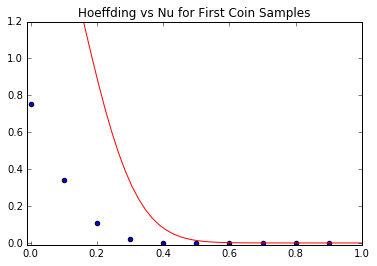

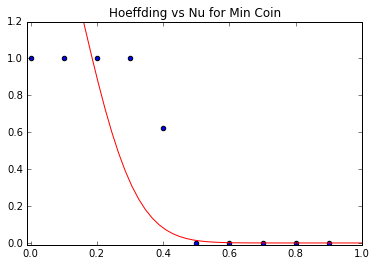

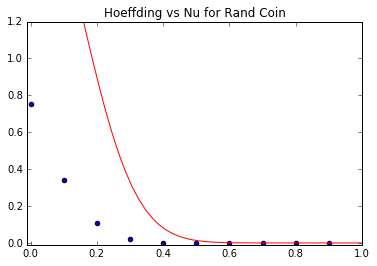

In [86]:
# the right side of the hoeffding inequality for N = 10 samples
hoef = lambda ep: 2 * np.exp(-2 * ep*ep * 10 )

# epsilons to test for
epsilon = np.arange(0, 1, 0.1)

# get fraction of time nu - mu was greater than this number as computed probability
prob = lambda ep, nu: nu[np.abs(0.5 - nu) > ep].shape[0] / nu.shape[0]

x = np.linspace(0, 1)


for ep in epsilon:
    plt.scatter(ep, prob(ep, nu_1), c = 'b', s = 20)
    
plt.plot(x, hoef(x), c = 'r')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.2)
plt.title("Hoeffding vs Nu for First Coin Samples")
plt.show()

for ep in epsilon:
    plt.scatter(ep, prob(ep, nu_min), c = 'b', s = 20)
    
plt.plot(x, hoef(x), c = 'r')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.2)
plt.title("Hoeffding vs Nu for Min Coin")
plt.show()

for ep in epsilon:
    plt.scatter(ep, prob(ep, nu_rand), c = 'b', s = 20)
    
plt.plot(x, hoef(x), c = 'r')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.2)
plt.title("Hoeffding vs Nu for Rand Coin")
plt.show()


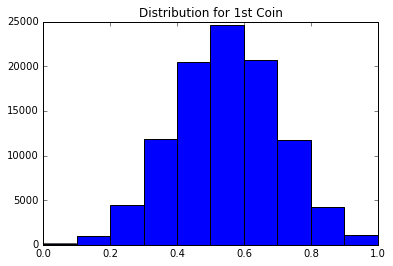

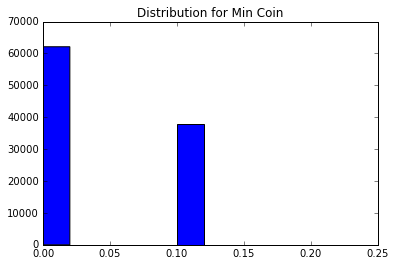

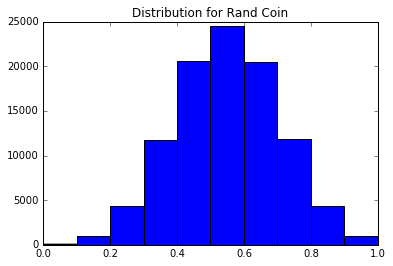

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(nu_1)
plt.title("Distribution for 1st Coin")
plt.show()

plt.hist(nu_min)
plt.title("Distribution for Min Coin")
plt.show()

plt.hist(nu_rand)
plt.title("Distribution for Rand Coin")
plt.show()


Q1. The average value of $\nu_{\text{min}}$ is closest to:

A. nu_min $\approx$ 0.038 which is closest to,

__[b] 0.01 __

Q2. Which coin(s) has a distribution of $\nu$ that satisfies the (single-bin) Hoeffding Inequality?

A. It's clear from both the graphs (where the computed points should never exceed the Hoeffding bound) and histograms (below; given that the distribution is expected to be Bernoulli), that the min coin is the only coin that does not satisfy the Hoeffding. So, 

__[d] $c_1$ and $c_{\text{rand}}$ __

Consider the bin model for a hypothesis $h$ that makes an error with probability $\mu$ in approximating a deterministic target function $f$ (both $h$ and $f$ are binary functions).
If we use the same $h$ to approximate a noisy version of $f$ given by:

$$\mathbb{P}(y|x) =  \begin{cases} 
      \lambda & y = f(x) \\
      1 - \lambda & y \neq f(x) 
   \end{cases}
 $$
 
Q3. What is the probability of error that $h$ makes in approximating $y$? _Hint: Two wrongs can make a right!_

A. We deal with this in cases; there are 4 total cases regarding the agreement of the 2 functions. The only two times $h$ incorrectly approximates $y$ is when $h$ approximates $f$ but $y$ does not approximate $f$, and when $h$ does not approximate $f$ and $y$ does approximate $h$. 

So, 

$$\mathbb{P} (y \neq h) = \mathbb{P} [ (h=f) \cap (y \neq f) ] + \mathbb{P} [ (h \neq f) \cap (y=h) ] $$ 

Since the functions are indepdenent, 

$$= \mathbb{P} (h = f) \mathbb{P}(y \neq f) + \mathbb{P} (h \neq f) \mathbb{P} (y = h) = (1 -\mu)(1 - \lambda) +  \mu \lambda$$



__A. [e] $ (1 -\mu)(1 - \lambda) +  \mu \lambda$__

Q4. At what value of $\lambda$ will the performance of $h$ be independent of $\mu$?

Just by looking at the above, 0.5, since $\lambda = 0.5$ implies

$$\mathbb{P}(y \neq h) = (1 - \mu)(0.5) + 0.5\mu = 0.5 - 0.5\mu + 0.5 \mu = 0.5$$

and the $\mu$ cancels. 

__A. [b] 0.5 __

In [640]:
class LinearRegression():
    ''' Linear Regression Model (2D)'''
    def __init__(self, N, target = None, transform = None):
        # number of data points
        self.N = N
        
        # generate random data points
        self.x = np.random.uniform(-1, 1,(N, 2))
        
        # add column for x_0 = 1 on data to account for threshhold
        self.x = np.concatenate((np.repeat(1,N).reshape(N, 1), self.x), axis=1)
   
        if target:
            self.target = target
        else:
            # get 2 points to determine target function
            p = np.random.uniform(-1, 1, (2,2))
            m = (p[1][1] - p[0][1]) / (p[1][0] - p[0][0])
            b = p[1][1] - m * p[1][0]

            # equation for a line
            self.t = lambda x: m*x[1] + b
            
            # equation applied per column
            self.tar = lambda x: np.apply_along_axis(self.t, 1, x)
            
            # full target function that maps to 1 or -1
            self.target = lambda x: np.where(self.tar(x) - x[:, 1] > 0, 1, -1)



            
        # get correct y vector with target function
        self.y = self.target(self.x)
        
        if transform:
            # apply transform to data if supplied
            self.x = transform(self.x)
            
        # set weights initially to zero
        self.w = np.zeros(self.x.shape[1])
        
        # iterations 
        self.iterations = 0
        
    
    def h(self, data):
        ''' hypothesis function is inner product of weights'''
        return np.inner(self.w.T, data)
        
    def regress(self):
        ''' compute psuedo-inverse, multiply by y, update weights '''
        self.w = np.inner(np.linalg.pinv(self.x), self.y)
        
    def g(self, h, data):
        ''' takes hypothesis and makes classification based on sign '''
        return np.where(h(data) > 0, 1, -1)
    
    def ein(self):
        ''' E_in: fraction of in sample points that got classified incorrectly '''
        return self.y[self.g(self.h, self.x) != self.y].shape[0] / self.y.shape[0]
        
    def run(self):
        ''' run through regression once, return (Ein, g(x)) tuple '''
        self.regress()
        return (self.ein(), lambda x: self.g(self.h, x), self.target)
    
    def error(self):
        ''' squared error '''
        e = self.h(self.x) - self.target(self.x)
        return e*e
    
    def addNoise(self, amount):
        ''' adds specified amount of noise to output '''
        # get shuffled noise mask that contains right proportions of 1s and -1s
        noisy = int(amount * self.N)
        noise_mask = np.concatenate((np.repeat(-1, noisy), np.repeat(1, self.N - noisy)), axis =0)
        np.random.shuffle(noise_mask)
        
        # multiply noise mask and y to add noise
        self.y = self.y * noise_mask

    def plot(self):
        ''' plot hypothesis function and color coded data points '''
        # separate data into positive and negative, scatter plot them by color
        positive = [p for i,p in enumerate(self.x) if self.y[i] == 1]
        negative = [p for i,p in enumerate(self.x) if self.y[i] == -1]

        for p in positive:
            plt.scatter(p[1], p[2], s = 50,c='blue')

        for n in negative:
            plt.scatter(n[1], n[2], s = 50, c='red')

        
        # decision boundary line (solve weights equation x_0 *w_0 + x_1 * w_1 + x_2 * w_2 = 0)
        x = np.arange(0,1,0.01)
        hyp = lambda x: (-self.w[1] / self.w[2]) * x - (self.w[0] / self.w[2])

        plt.plot(x, hyp(x))
        plt.xlim([-1,1])
        plt.ylim([-1,1])
    
        
        

0.03039


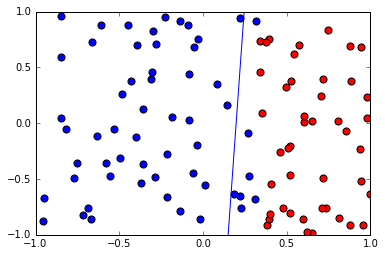

In [641]:
# store ein and g's as list of tuple
gs = []
eins = np.empty(1000)

for i in range(1000):
    trial = LinearRegression(100)
    (eins[i], g, y) = trial.run()
    gs.append((g, y))

print(np.average(eins))
trial.plot()

Q5. Take $N = 100$. Use Linear Regression to find $g$ and evaluate $E_{\text{in}}$, the fraction of in-sample points which got classified incorrectly. Repeat the experiment $1000$
times and take the average (keep the $g$’s as they will be used again in Problem
6). Which of the following values is closest to the average $E_\text{in}$? (Closest is the
option that makes the expression |your answer - given option|| closest to 0. 

__A. [c] 0.01 __

In [642]:
# generate test data to get eouts
test = np.random.uniform(-1, 1, (1000, 2))
test = np.concatenate((np.repeat(1, 1000).reshape(1000, 1), test), axis=1)

eouts = np.empty(1000)

for i, (g, y) in enumerate(gs):
    eouts[i] = (y(test)[g(test) != y(test)].shape[0]) / y(test).shape[0]
    
np.average(eouts)

0.038127000000000001

Q6. Now, generate 1000 fresh points and use them to estimate the out-of-sample
error $E_{\text{out}}$ of $g$ that you got in Problem 5 (number of misclassified out-of-sample
points / total number of out-of-sample points). Again, run the experiment 1000
times and take the average. Which value is closest to the average $E_{\text{out}}$?

__A. [c] 0.01 __

Q7. Now, take N = 10. After finding the weights using Linear Regression, use
them as a vector of initial weights for the Perceptron Learning Algorithm. Run
PLA until it converges to a final vector of weights that completely separates
all the in-sample points. Among the choices below, what is the closest value to
the average number of iterations (over 1000 runs) that PLA takes to converge?
(When implementing PLA, have the algorithm choose a point randomly from
the set of misclassified points at each iteration)

In [622]:
class Perceptron:
    ''' Perceptron Learning Algorithm that takes in starting values '''
    
    def __init__(self, weights, x, y):        
        self.w = weights
        self.x = x
        self.y = y

        # keep track of lowest error and best weights for pocket algo
        #self.ein = float('inf')
        #self.best_w = self.w
        # count of iterations
        self.iterations = 0 

    def h(self, data):
        ''' returns hypothesis function applied to data as numpy array '''
        # get inner product
        inner = np.inner(self.w.T, data)
        
        # remap to 1 or -1 if positive or non-positive
        inner = np.where(inner > 0, int(1), int(-1))
        return inner
        
    
    def update(self):
        ''' apply one iteration of learning '''
        # increment iterations
        self.iterations += 1
        
        hyp = self.h(self.x)
        # get all misclassified points, multiply by what direction it's wrong in
        #missed = [self.y[i]*self.x[i] for i in range(self.N) if self.h()[i]!= self.y[i]] 
        missed = (hyp != self.y)
        ys = self.y[missed]
        wrong = len(ys)
        if wrong == 0:
            # if nothing misclassified, learning complete
            return True
        else:
            # randomly choose a wrong point, use it to update weights
            wrong_index = np.random.randint(len(ys))
            self.w += ys[wrong_index] * self.x[missed][wrong_index]
            return False
        
        
    def run(self):
        ''' run pocket algorithm until converges or exceeds 100000 iterations '''
    
        while (self.iterations < 100000):
            done = self.update()
            if done:
                break

                    
        return self.iterations

In [643]:
it = np.empty(1000).astype(int)

for i in range(1000):
    lin = LinearRegression(10)
    lin.regress()
    pla = Perceptron(lin.w, lin.x, lin.y)
    it[i] = pla.run()
    
print(np.average(it))

4.38


__[a] 1 __

In these problems, we again apply Linear Regression for classification. Consider the
target function:
$$f(x_1, x_2) = \text{sign}(x_1^2 + x_2^2 − 0.6) $$

Generate a training set of $N = 1000$ points on $X = [−1, 1] × [−1, 1]$ with a uniform
probability of picking each $x \in X$ . Generate simulated noise by flipping the sign of
the output in a randomly selected $10%$ subset of the generated training set.

Q8. Carry out Linear Regression without transformation, i.e., with feature vector:
$$(1, x_1, x_2),$$

to find the weight $\textbf{w}$. What is the closest value to the classification in-sample
error $E_{\text{in}}$? (Run the experiment 1000 times and take the average $E_{\text{in}}$ to reduce variation in your results.)

In [648]:
# define target function
nonlin_t = lambda x: x[1]*x[1] + x[2]*x[2] - 0.6
nonlin_tar = lambda x: np.apply_along_axis(tar, 1, x)
nonlin_target = lambda x: np.where(nonlin_tar(x) > 0, 1, -1)


# array to hold ein
eins = np.empty(1000)

for i in range(1000):
    lin = LinearRegression(1000, target = nonlin_target)
    lin.addNoise(0.1)
    eins[i], _, _ = lin.run()
    
print(np.average(eins))


0.503517


__A. [d] 0.5 __

Q9. Now, transform the $N = 1000$ training data into the following nonlinear feature
vector:
$$(1, x_1, x_2, x_1x_2, x_1^2, x_2^2)$$

Find the vector $\tilde{\textbf{w}}$ that corresponds to the solution of Linear Regression. Which
of the following hypotheses is closest to the one you find? Closest here means
agrees the most with your hypothesis (has the highest probability of agreeing on
a randomly selected point). Average over a few runs to make sure your answer
is stable.


In [650]:
def transform(x):
    ''' transform data from (1, x1, x2) -> (1, x1, x2, x1*x2, x1^2, x2^2) '''
    # add x1*x2 feature
    x = np.concatenate((x, (x[:, 1] * x[:, 2]).reshape(1000,1)), axis = 1)

    # add x1^2 feature
    x = np.concatenate((x, (x[:, 1]*x[:, 1]).reshape(1000, 1)), axis = 1)

    # add x2^2 feature
    x = np.concatenate((x, (x[:, 2]*x[:, 2]).reshape(1000, 1)), axis = 1)
    
    return x

# list to hold weight vectors
weights = []
for i in range(1000):
    nonlin = LinearRegression(1000, target = nonlin_target, transform = transform)
    nonlin.addNoise(0.1)
    nonlin.run()
    weights.append(nonlin.w)

est = np.array(weights)

In [654]:
np.average(est, axis = 0)

array([ -9.91658672e-01,   3.73554710e-04,  -1.35956160e-03,
         4.38808482e-04,   1.55556827e+00,   1.55793261e+00])

__A. [a] $ g(x_1, x_2) = \text{sign}(−1 − 0.05x_1 + 0.08x_2 + 0.13x_1x_2 + 1.5x_1^2 + 1.5 x_2^2)$__

In [657]:
# new testing data
test = np.random.uniform(-1, 1, (1000, 2))

# add zeros for x0
test = np.concatenate((np.repeat(1, 1000).reshape(1000, 1), test), axis = 1)

# classify points using target function
test_y = nonlin_target(test)

# using add noise function from above to add .1 noise
noisy = int(0.1 * 1000)
noise_mask = np.concatenate((np.repeat(-1, noisy), np.repeat(1, 1000 - noisy)), axis =0)
np.random.shuffle(noise_mask)

# multiply noise mask and test_y
test_y = test_y * noise_mask

eout = 